# K-means classification

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [11]:
# --- 1. Load train set ---
train = pd.read_parquet("train.parquet")  # Path as needed

# --- 2. Select only numeric features (exclude IDs, label) ---
top_features = [
    "X752", "X759", "X444", "X758", "X445",   # SHAP
    "X778", "X750", "X345", "X466",           # MI
    "X614", "X610"                            # Perm
]
top_features = list(dict.fromkeys(top_features))
X = train[top_features]


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Run KMeans ---
n_clusters = 5  # You can adjust this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# === 4. PCA for 2D Plotting ===
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

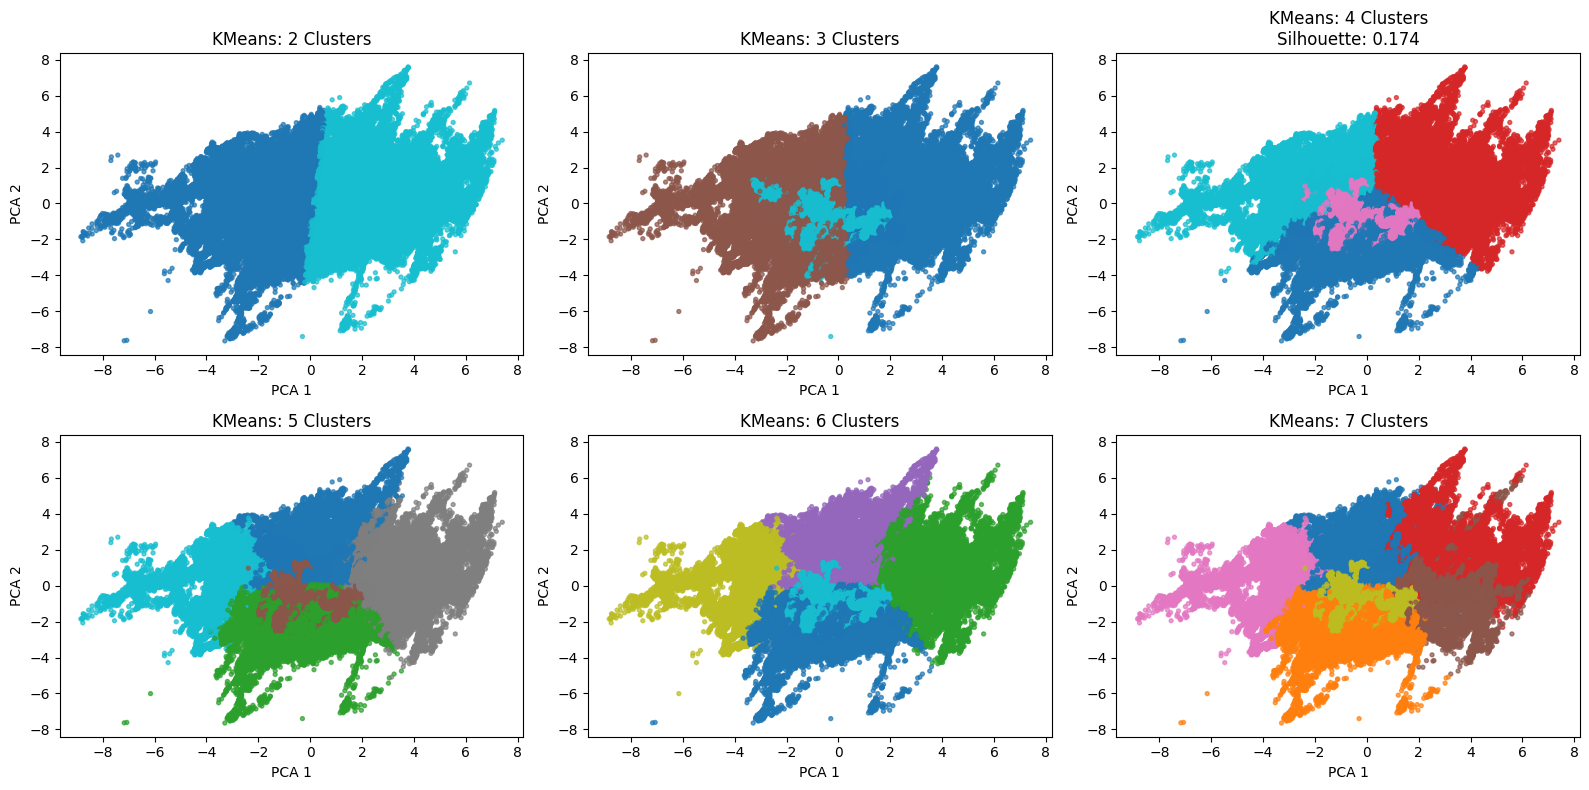

Silhouette score for 4 clusters: 0.174


In [14]:
from sklearn.metrics import silhouette_score

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
n_clusters_list = [2, 3, 4, 5, 6, 7]
silhouette_scores = []

for ax, n_clusters in zip(axes.flatten(), n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
    clusters = kmeans.fit_predict(X_scaled)
    # Only compute silhouette for n_clusters==4
    if n_clusters == 4:
        sil_score = silhouette_score(X_scaled, clusters)
        silhouette_scores.append(sil_score)
        title = f'KMeans: {n_clusters} Clusters\nSilhouette: {sil_score:.3f}'
    else:
        title = f'KMeans: {n_clusters} Clusters'
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=8, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

plt.tight_layout()
plt.show()

if silhouette_scores:
    print(f"Silhouette score for 4 clusters: {silhouette_scores[0]:.3f}")


In [ ]:
#no real structure, with silhouette score of 0.174